In [1]:
from darts import TimeSeries


In [ ]:

from model import tipping_point
tp = tipping_point()
tp.collect_samples(10)
tp.plot('fig.png')

In [5]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../")
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from model import tipping_point
from darts import TimeSeries
import torch
from darts.models import RNNModel, TCNModel, TransformerModel
from darts.utils.likelihood_models import LaplaceLikelihood
from my_agents.utils import preprocessed_t_series, truth_dist
import argparse
import yaml


In [10]:
class Settings:
    model = "lstm"
    n_samples = 1000
    output_file_name = "trash"
    plot = True
    seed = 42
args = Settings()    


In [11]:
np.random.seed(args.seed)

if args.model == "lstm":
    from my_agents.train_hyperparams.lstm import hyperparameters
elif args.model == "tcn":
    from my_agents.train_hyperparams.tcn import hyperparameters
elif args.model == "transformer":
    from my_agents.train_hyperparams.transformer import hyperparameters

hyperparameters["random_state"] = args.seed

model = {"lstm" : RNNModel, "tcn" : TCNModel, "transformer" : TransformerModel}[args.model.lower()]
# Generating time series
train_series = preprocessed_t_series(args.n_samples)

my_model = model(
    likelihood=LaplaceLikelihood(),
    **hyperparameters
)

my_model.fit(
    train_series,
    verbose=True,
)


[2022-04-01 20:18:08,768] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-04-01 20:18:08,768] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-04

Epoch 3:  33%|███▎      | 1/3 [00:00<00:00,  5.24it/s, loss=0.448, v_num=logs, train_loss=0.238]

/home/cboettig/boettiger-lab/mee_tipping_point_forecasting/venv/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:378: UserWarning: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
  warning_cache.warn(m)


Epoch 199: 100%|██████████| 3/3 [00:10<00:00,  3.59s/it, loss=-2.97, v_num=logs, train_loss=-3.11]


/home/cboettig/boettiger-lab/mee_tipping_point_forecasting/venv/lib/python3.8/site-packages/darts/timeseries.py:3305: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:02<00:00, -0.79it/s]


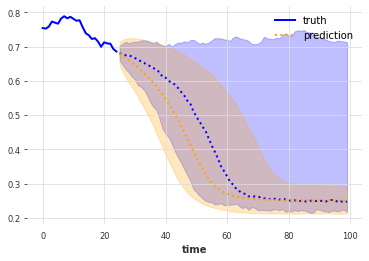

In [33]:


colors = ["blue", "green", "orange"]
torch.manual_seed(args.seed)
np.random.seed(args.seed)
train_series = preprocessed_t_series(1)
train_series[:25].plot(color="blue", label='truth')
t_series, v_series = train_series.split_before(25)
t_dist = truth_dist(t_series, n_samples=100)
t_dist[:75].plot(low_quantile=0.025, high_quantile=0.975, color="blue", label="_nolegend_", linestyle="dotted")
preds = my_model.predict(75, t_series, num_samples=10000)
fig = preds.plot(low_quantile=0.025, high_quantile=0.975, linestyle="dotted", color="orange", label='prediction')
